In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_pickle('diamonds_train.pkl')

In [8]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

# pre-processing

In [9]:
train_df.describe()

,carat,depth,table,price,x,y,z
count,32364.000000,32364.00000,32364.000000,32364.000000,32364.000000,32364.000000,32364.000000
mean,0.799852,61.75250,57.458148,3941.415925,5.735155,5.737073,3.540692
std,0.475173,1.43494,2.218526,3987.959617,1.123716,1.115085,0.695932
min,0.200000,43.00000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.00000,56.000000,954.000000,4.720000,4.720000,2.910000
50%,0.700000,61.80000,57.000000,2423.500000,5.700000,5.720000,3.530000
75%,1.040000,62.50000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.00000,79.000000,18823.000000,10.740000,10.540000,6.980000


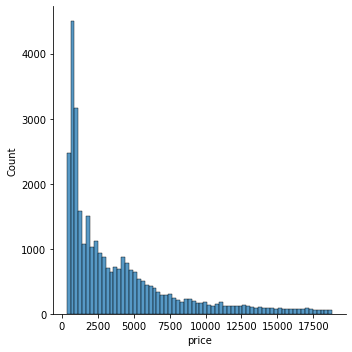

In [51]:
target_name = 'price'

sns.displot(train_df[target_name])

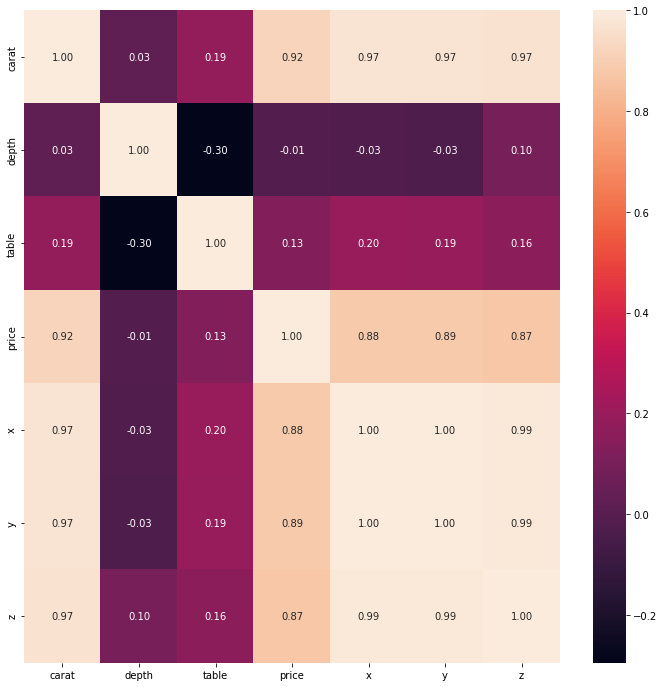

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')
plt.show()

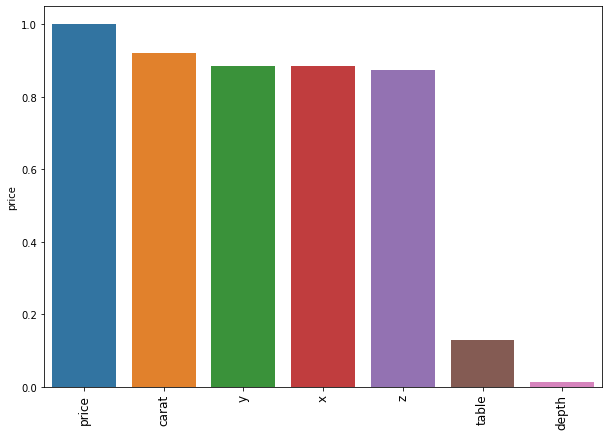

In [14]:
corr_matrix = train_df.corr()
sale_corr = corr_matrix[target_name].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=sale_corr.index, y=sale_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [15]:
categorical_features = train_df[[col for col in train_df.columns if train_df[col].dtype==object]].columns

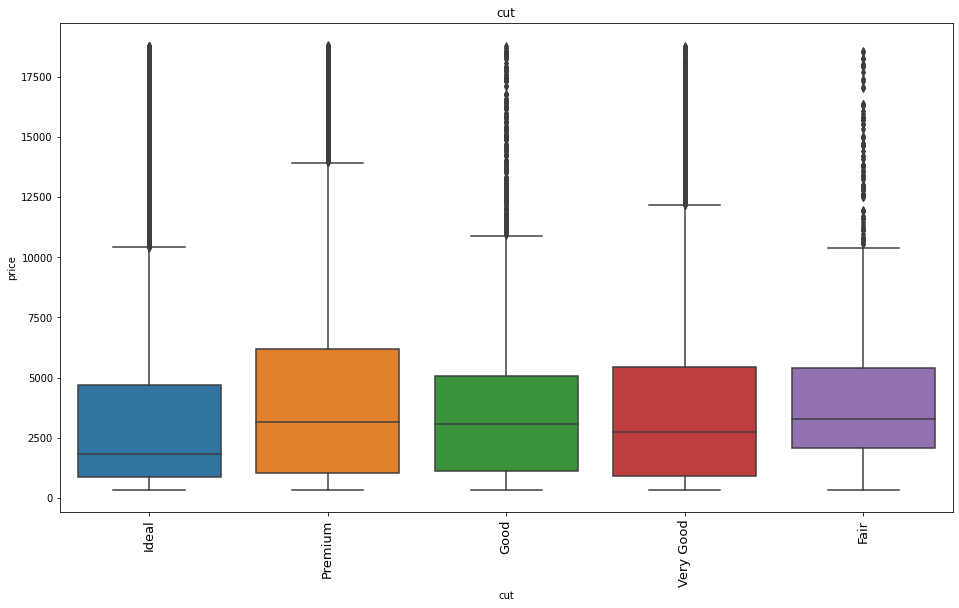

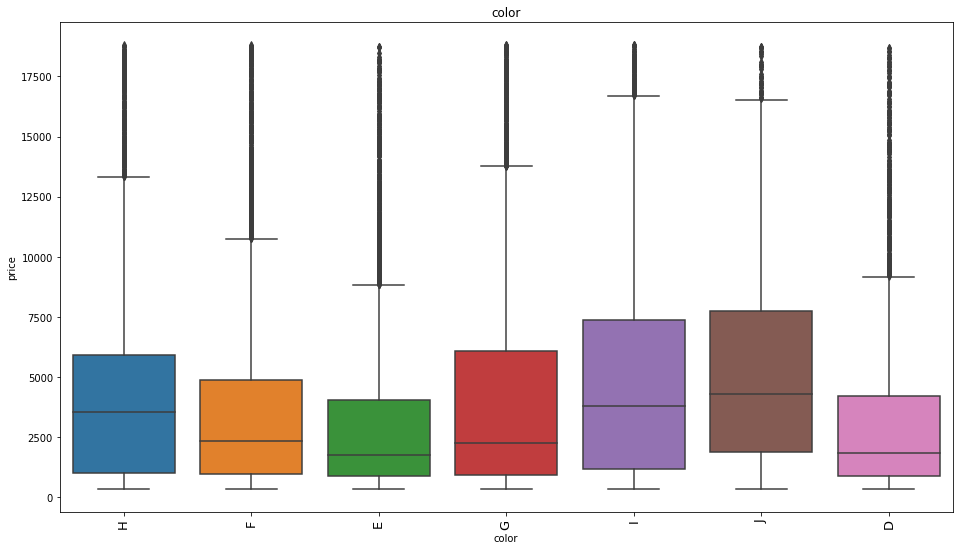

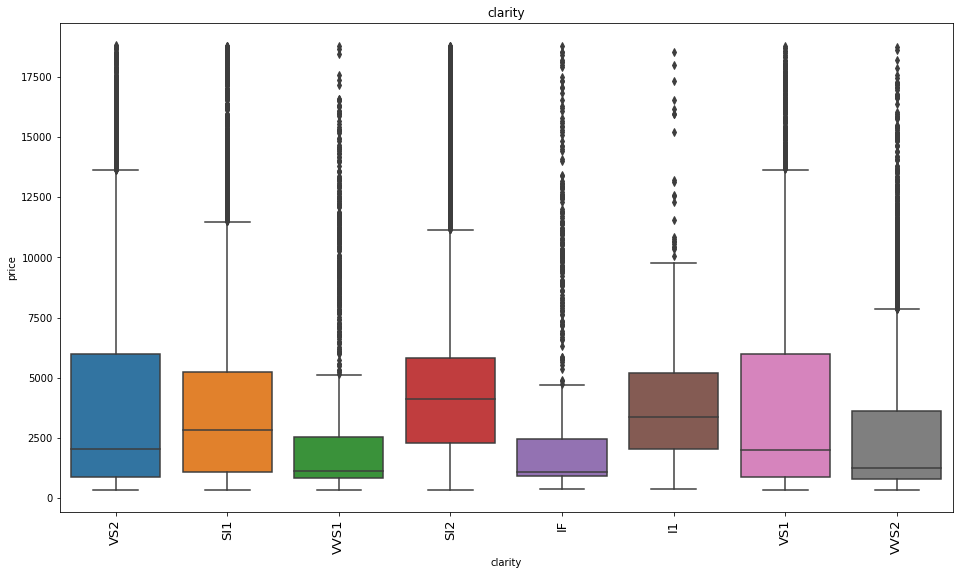

In [16]:
for feature in categorical_features:
  plt.figure(figsize=(16,9))
  sns.boxplot(x=feature, y=target_name, data=train_df)
  plt.title(feature)
  plt.xticks(rotation=90, fontsize=13);

In [22]:
price_dict = dict()
for price in set(train_df['price']):
  price_dict[price] = train_df[train_df['price']==price][target_name].mean()

In [23]:
price_series = pd.Series(price_dict)
price_series.sort_values(ascending=False)

18823    18823.0
18806    18806.0
18804    18804.0
18797    18797.0
18795    18795.0
          ...   
340        340.0
337        337.0
336        336.0
327        327.0
326        326.0
Length: 9477, dtype: float64

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(train_df.drop([target_name]+list(categorical_features), axis=1), train_df[target_name])

In [30]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

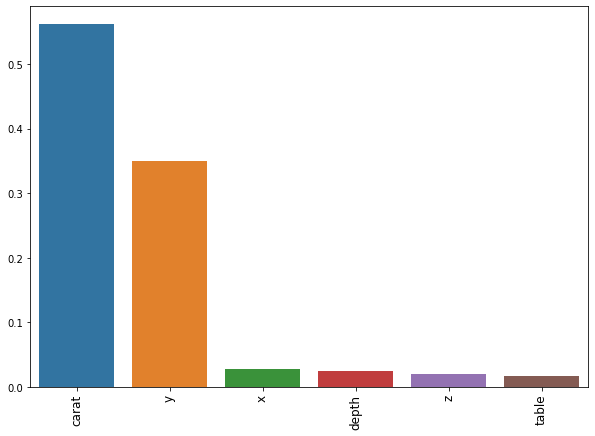

In [52]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [32]:
importances

carat    0.561220
y        0.350088
x        0.028134
depth    0.025215
z        0.019230
table    0.016112
dtype: float64

In [33]:
features = list(importances[:3].index)

In [34]:
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)


from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

0.8523009998362495
0.7758683655715615


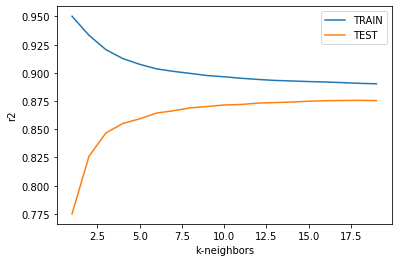

In [59]:
from sklearn.neighbors import KNeighborsRegressor

r2_train_list = list()
r2_test_list = list()
for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors=k)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

   
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(range(1,20), r2_train_list, label='TRAIN')
plt.plot(range(1,20), r2_test_list, label='TEST')
plt.xlabel('k-neighbors')
plt.ylabel('r2')
plt.legend()
plt.show()

In [58]:
k=4
model = KNeighborsRegressor(n_neighbors=k)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.9126920858948826
0.8551080072181426


In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [56]:
results = cross_validate(model, X_train, y_train, cv=KFold(n_splits=20), scoring=['r2'], return_train_score=True)

In [55]:
display(results)

{'fit_time': array([0.02170253, 0.01139998, 0.01411653, 0.0099926 , 0.00877237,
        0.00975275, 0.00879788, 0.00929403, 0.00855255, 0.01140738]),
 'score_time': array([0.00406957, 0.00293207, 0.00377321, 0.00363994, 0.00401926,
        0.00305676, 0.00286293, 0.00327945, 0.00310612, 0.00304818]),
 'test_r2': array([0.84471084, 0.85389555, 0.85618926, 0.86094203, 0.86560872,
        0.85746904, 0.82851401, 0.84827132, 0.8535211 , 0.85969209]),
 'train_r2': array([0.85312892, 0.85211093, 0.85186006, 0.85127014, 0.8507234 ,
        0.85173822, 0.85439664, 0.85271349, 0.8521517 , 0.85146629])}

In [54]:
train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.852
Test r2:  0.853


In [53]:

from sklearn.model_selection import ShuffleSplit

results = cross_validate(model, X_train, y_train, cv=ShuffleSplit(n_splits=10), scoring=['r2'], return_train_score=True)
train_r2 = np.mean(results['train_r2'])
test_r2 = np.mean(results['test_r2'])
print('Train r2: ', round(train_r2, 3))
print('Test r2: ', round(test_r2, 3))

Train r2:  0.852
Test r2:  0.853
